In [1]:
root_path = '/home/drl/PycharmProjects/rl_baselines/pytorch-a2c-ppo-acktr'
import os 
os.chdir(root_path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from utils import IO
from utils.Logger import LoggerCsv
from eval.plot_results import *
from math import pi, sin, cos

 v_e = eval_data_df.loc[:, '1':'6'].values

c_command = eval_data_df.loc[:, '7':'9'].values

xyz = eval_data_df.loc[:, '10':'12'].values

In [2]:
#GA_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/GA_straight_line'

exp_id = 42
num_data = 2

RL_data_path = 'eval/results_any/F3_turning/original'


exp_data_path = os.path.join(RL_data_path, 'No{}'.format(exp_id))
exp_dir_list = os.listdir(exp_data_path)
exp_dir_list

['log_data_c5.csv', 'log_data_0.csv', 'log_data_c7.csv']

In [3]:
save_fig_path = 'eval/results_any/F3_turning'


GA_data_df = []
RL_data_df =[]
for i in range(num_data):
    rl_data_df = pd.read_csv(os.path.join(exp_data_path,exp_dir_list[i].format(i)))
    RL_data_df.append(rl_data_df)

max_step = 4000
dt = 0.01

In [4]:
exp_i = 0
xyz = RL_data_df[exp_i].loc[:, '10':'12'].values
v_e = RL_data_df[exp_i].loc[:, '1':'6'].values
c_command = RL_data_df[exp_i].loc[:, '7':'9'].values

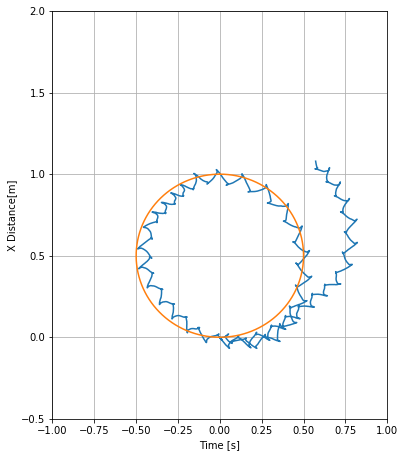

In [5]:

plt.figure(figsize=(6,6*1.25))
 
t = np.arange(0, max_step * dt, dt)
 
R = c_command[0, 0]
n = np.arange(0, pi*2, 0.01)
x_f = R * np.sin(n)
y_f = R * np.cos(n) +R

pos_x = xyz[:max_step, 0]
pos_y = xyz[:max_step, 1]

vel_f = c_command[:max_step, 0]



plt.plot(pos_x, pos_y)
plt.plot(x_f, y_f)

plt.xlabel('Time [s]')
plt.ylabel('X Distance[m]')
plt.grid(True)
plt.xlim([-1,1])
plt.ylim([-0.5,2])


data = [ R, x_f, y_f, pos_x, pos_y]
IO(save_fig_path+'/EXP{}-No{}_f2{}-4000.pkl'.format(exp_id, exp_i, exp_dir_list[exp_i])).to_pickle(data)

plt.savefig(os.path.join(save_fig_path, 'EXP{}-No{}_f2{}.jpg'.format(exp_id, exp_i, exp_dir_list[exp_i])))
plt.show()

## Summary

In [6]:
result3 = IO(save_fig_path+'/EXP27-No1_f2log_data_c3-4000.csv.pkl').read_pickle()
result5 = IO(save_fig_path+'/EXP27-No2_f2log_data_c5-4000.csv.pkl').read_pickle()
result6= IO(save_fig_path+'/EXP27-No3_f2log_data_c6-4000.csv.pkl').read_pickle() 
result7= IO(save_fig_path+'/EXP27-No0_f2log_data_c7-4000.csv.pkl').read_pickle() 
result10= IO(save_fig_path+'/EXP27-No4_f2log_data_c10-4000.csv.pkl').read_pickle() 

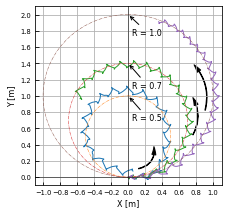

In [17]:



max_step = 2000
t = np.arange(0, max_step * dt, dt)

def plot_circle(result, max_step =2000):
    pos_x = result[3][:max_step]
    pos_y = result[4][:max_step]
    x_f = result[1][:max_step]
    y_f = result[2][:max_step]
    R = result[0]

    plt.plot(pos_x, pos_y, linewidth=1.0)
    plt.plot(x_f, y_f, '-.', linewidth= 0.5)

from matplotlib import patches
def plot_curve_arrow(start_point, end_point, plt, arc = 0.5):
    style="Simple,tail_width=0.5,head_width=4,head_length=8"
    kw = dict(arrowstyle=style, color="k")

    a3 = patches.FancyArrowPatch(start_point,end_point,connectionstyle="arc3, rad={}".format(arc), **kw)
    plt.gca().add_patch(a3)
 
 
    
#plt.figure(figsize=(6,6 ))

from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.lines import Line2D

figsize = 6,6

plt.rcParams['xtick.direction'] = 'in' 
plt.rcParams['ytick.direction'] = 'in' 
fig, ax = plt.subplots(figsize=figsize)

#plot_circle(result3, max_step=1700)
plot_circle(result5, max_step =2000)
#plot_circle(result6, max_step=2000)
plot_circle(result7, max_step=2000)
plot_circle(result10, max_step=2000)


plt.annotate('R = 0.5', xy=(0, 1), xytext=(0.05, 0.70),fontsize=8,
             arrowprops=dict(arrowstyle = '->',facecolor='black'))
plt.annotate('R = 0.7', xy=(0, 1.4), xytext=(0.05, 1.10),fontsize=8,
             arrowprops=dict(arrowstyle = '->',facecolor='black'))
plt.annotate('R = 1.0', xy=(0, 2.0), xytext=(0.05, 1.75),fontsize=8,
             arrowprops=dict(arrowstyle = '->',facecolor='black'),)

plt.xlim([-1.1,1.1])
plt.ylim([-0.1,2.1])
plt.grid()

 
plot_curve_arrow((0.1,0.1), (0.3,0.4), plt)
plot_curve_arrow((0.75,0.5), (0.75,1.0), plt, arc = 0.3)
plot_curve_arrow((0.9,0.8), (0.76,1.4), plt, arc = 0.28)



#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=6.8)
plt.xticks(np.arange(-1 ,1.1, 0.2))  
plt.yticks(np.arange(-0 ,2.1, 0.2))  

 
# 创建两条线，并添加
from matplotlib.lines import Line2D
line1 = [(-1.1, 0), (1.1, 0)]
line2 = [(0,  -0.1), (0, 2.1)]
(line1_xs, line1_ys) = zip(*line1)
(line2_xs, line2_ys) = zip(*line2)

ax.add_line(Line2D(line1_xs, line1_ys, linewidth=0.5, color='k'))
ax.add_line(Line2D(line2_xs, line2_ys, linewidth=0.5, color='k'))
 
# 坐标轴设置
font1 = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 8,
}
 
plt.xlabel('X [m]', font1)
plt.ylabel('Y [m]', font1) 
 
 

fig.set_size_inches(8.8/2.54 ,8.8/2.54*(0.95))
fig.subplots_adjust(left=0.15)
plt.savefig(save_fig_path+'/turning_trajectories.svg', dpi=600,  pad_inches=0 )
plt.show()

In [8]:
def print_rmsmax(result ):
    pos_x = result[3][:max_step]
    pos_y = result[4][:max_step]
    r = result[0]
    
    e = np.sqrt((pos_x - 0)**2 +(pos_y - r)**2) - r
    
    print('r = ', r)
    
    rms =  np.sqrt(e **2).mean()
    max = np.sqrt(e **2).max()
    print('rms=',rms)
    print('max=',max )
    return rms, max
    
# print('our leaning:')
# rms1, max1= print_rmsmax(pos1, pos_f)
# print('pid leaning:')
# rms2, max2=print_rmsmax(pos3, pos_f)  

print_rmsmax(result3)
print_rmsmax(result5)
print_rmsmax(result6)
print_rmsmax(result7)
print_rmsmax(result10)

r =  0.3
rms= 0.07302671865177017
max= 0.1895001530157998
r =  0.5
rms= 0.043366084515745563
max= 0.13106390231587683
r =  0.6
rms= 0.04238261116406164
max= 0.1369483131435162
r =  0.7
rms= 0.023431094889358683
max= 0.09736468118826469
r =  1.0
rms= 0.02252394180260766
max= 0.07341013955044207


(0.02252394180260766, 0.07341013955044207)

TypeError: 'method' object is not subscriptable

/home/drl/anaconda3/envs/mujoco150/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


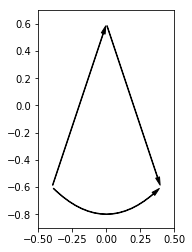

In [65]:
 

plt.axes().set_xlim(-.5,0.5)
plt.axes().set_ylim(-0.9,0.7)
plt.axes().set_aspect(1)

style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style, color="k")

a1 = patches.FancyArrowPatch((-0.4,-0.6), (0,0.6),**kw )
a2 = patches.FancyArrowPatch((0,0.6), (0.4,-0.6),**kw)
a3 = patches.FancyArrowPatch((-0.4,-0.6), (0.4,-0.6),connectionstyle="arc3,rad=.5", **kw)

for a in [a1,a2,a3]:
    plt.gca().add_patch(a)
plt.show()

In [79]:
com  = pd.read_csv('eval/com_s1.csv')
command =np.array(com)
command.shape

(2000, 3)

In [29]:
for i in [2,3,5,6,7,8,9,10,12,15]:
    com  = pd.read_csv('eval/cmd_c{}.csv'.format(i))
    command =np.array(com)
    IO('data/cmd_c{}.pkl'.format(i)).to_pickle(command)


In [59]:
a = IO('data/cmd_c6.pkl').read_pickle()
a

array([[399.8,   0. ,   0. ],
       [399.8,   0. ,   0. ],
       [399.8,   0. ,   0. ],
       ...,
       [399.8,   0. ,   0. ],
       [399.8,   0. ,   0. ],
       [399.8,   0. ,   0. ]])

In [56]:
a = IO('data/cmd_s1.pkl').read_pickle()
a.shape

(2000, 3)

In [35]:
np.concatenate((a,a),axis=0) 


for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    

(4000, 3)

In [62]:
for j in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    a = np.array([int(j)/10.0, 0, 0]).reshape((1,-1))
    print(a)
    data = a
    for i in range(4000-1):
        data = np.concatenate((data,a),axis=0) 
    IO('data/cmd_c{}.pkl'.format(str(j))).to_pickle(data)
 

[[0.1 0.  0. ]]
[[0.2 0.  0. ]]
[[0.3 0.  0. ]]
[[0.4 0.  0. ]]
[[0.5 0.  0. ]]
[[0.6 0.  0. ]]
[[0.7 0.  0. ]]
[[0.8 0.  0. ]]
[[0.9 0.  0. ]]
[[1. 0. 0.]]
[[1.1 0.  0. ]]
[[1.2 0.  0. ]]
[[1.3 0.  0. ]]
[[1.4 0.  0. ]]
[[1.5 0.  0. ]]
